In [57]:
import code_assignment_2_guoyuan_liu as utils
import numpy as np
from tqdm import tqdm
import math
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
n = 100
q = 2
ns = [0.7, 0.3]
ps = np.array([[0.4, 0.3], [0.3, 0.5]])

g, A = utils.generate_data(n, q, ns, ps)

In [59]:
g

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0])

In [60]:
states = utils.run_mcmc(A, ns, ps, 1000)

100%|██████████| 1000/1000 [00:22<00:00, 45.03it/s]


In [61]:
states

[array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 

In [62]:
energies = []  # energy of the states[t]
overlaps = [] # overlap between the ground truth and the states[t]
fractions = [] # fraction of non-zero of the states[t]
for gt in tqdm(states):
    energies.append(utils.energy(gt, A, ns, ps))
    overlaps.append(utils.overlap(gt, g, ns))
    fractions.append(np.sum(gt != 0))


100%|██████████| 1001/1001 [00:11<00:00, 90.58it/s]


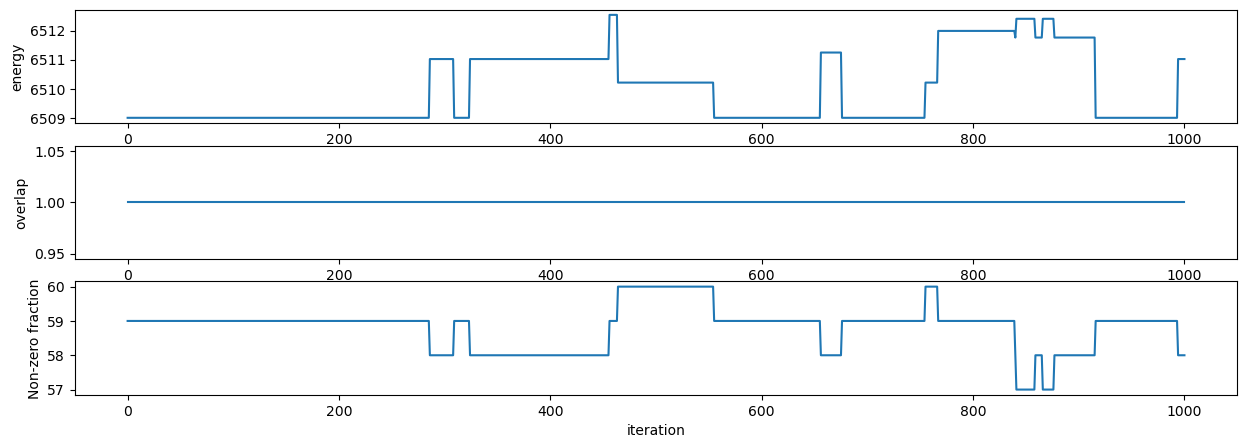

In [63]:
fig, ax = plt.subplots(3, 1, figsize=(15, 5))
ax[0].plot(energies)
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('energy')
ax[1].plot(overlaps)
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('overlap')
ax[2].plot(fractions)
ax[2].set_xlabel('iteration')
ax[2].set_ylabel('Non-zero fraction')
plt.show()


In [72]:
ns_history = utils.run_expectation_maximization(A, [0.55, 1-0.55], ps, 300, 10)

100%|██████████| 300/300 [00:06<00:00, 45.47it/s]


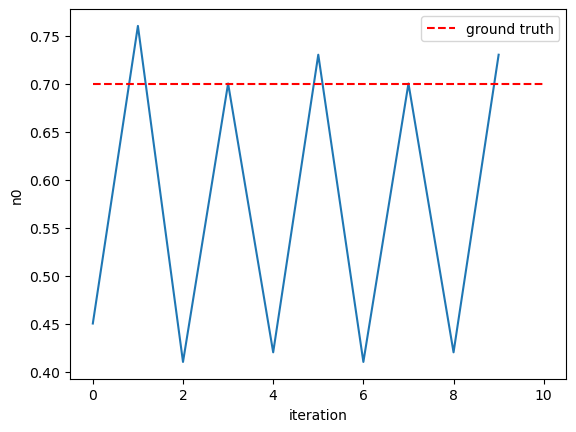

In [75]:
n0_history = [ns_history[i][0] for i in range(len(ns_history))]
plt.plot(n0_history)
plt.xlabel('iteration')
plt.ylabel('n0')
plt.plot([0, len(n0_history)], [0.7, 0.7], 'r--', label='ground truth')
plt.legend()
plt.show()

In [49]:
states[-1]

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0])

In [67]:
for i in map(lambda x: x+1, [1,2,3]):
    print(i)

2
3
4
